In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")

print("Path to dataset files:", path)

import pandas as pd
# Load the dataset
data = pd.read_csv(path + "/global_housing_market_extended.csv")
print(data.head())

Path to dataset files: /Users/rileyhaynie15/.cache/kagglehub/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024/versions/1
  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0 

/var/folders/pn/7n09rhd56t9dc86jswzv9q5m0000gn/T/ipykernel_61571/58733003.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=year_col, y=hpi_col, ci=None)


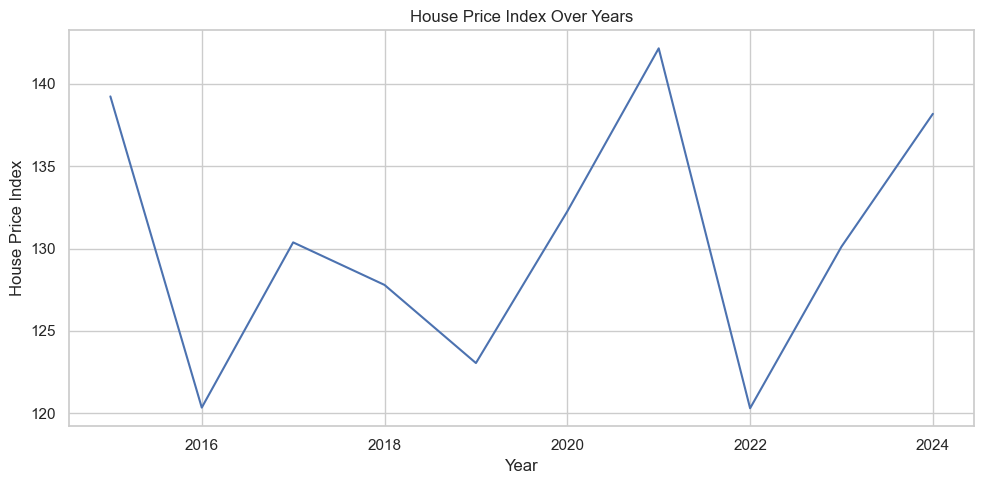

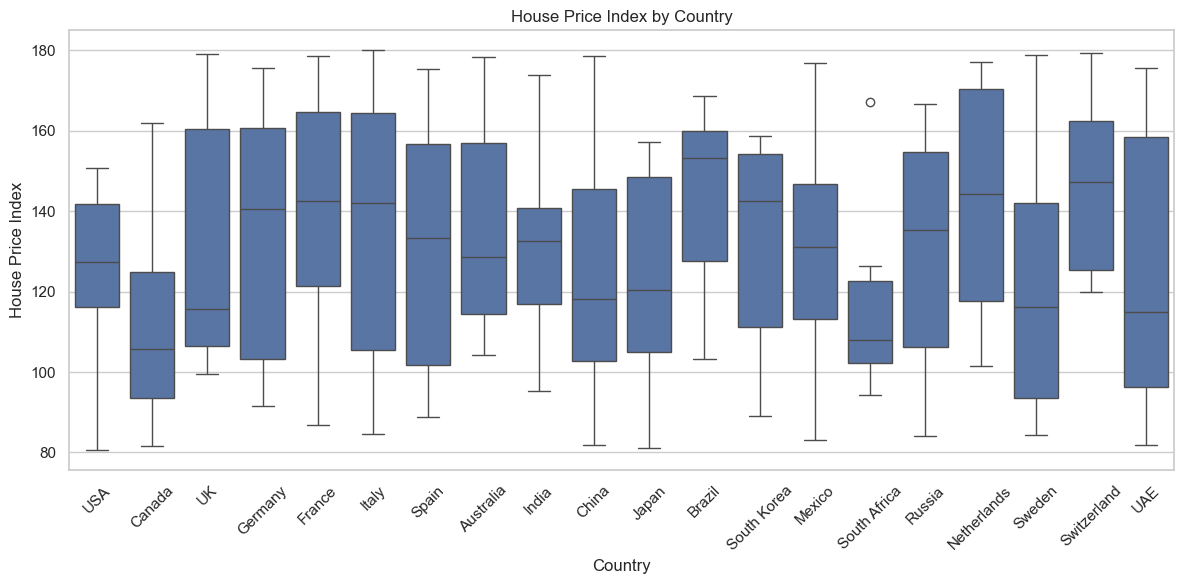

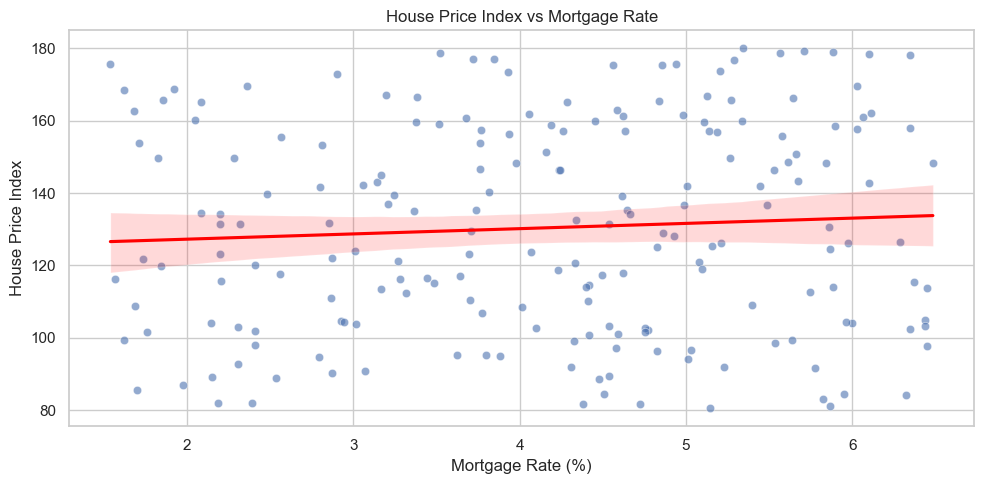

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Define column names (adjust if your dataset has different column names)
hpi_col = 'House Price Index'
year_col = 'Year'
country_col = 'Country'
mortgage_col = 'Mortgage Rate (%)'

# Step 3: Drop rows with missing values in relevant columns
df = data[[hpi_col, year_col, country_col, mortgage_col]].dropna()

# Step 4: Set the seaborn theme for better aesthetics
sns.set(style="whitegrid")

# Plot 1: Housing Price Index over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=year_col, y=hpi_col, ci=None)
plt.title("House Price Index Over Years")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.tight_layout()
plt.show()

# Plot 2: Housing Price Index by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=country_col, y=hpi_col)
plt.title("House Price Index by Country")
plt.xlabel("Country")
plt.ylabel("House Price Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Housing Price Index vs Mortgage Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=mortgage_col, y=hpi_col, alpha=0.6)
sns.regplot(data=df, x=mortgage_col, y=hpi_col, scatter=False, color="red")
plt.title("House Price Index vs Mortgage Rate")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("House Price Index")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define relevant columns
features = ['Year', 'Country', 'Mortgage Rate (%)']
target = 'House Price Index'

# Drop rows with missing data
df = data[features + [target]].dropna()

# Separate features and target
X = df[features]
y = df[target]

# Create preprocessing for categorical column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country'])
    ],
    remainder='passthrough'  # Let numeric columns pass through
)

# Build the full pipeline
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1271.4287535160609
R^2 Score: -0.3798790986713305


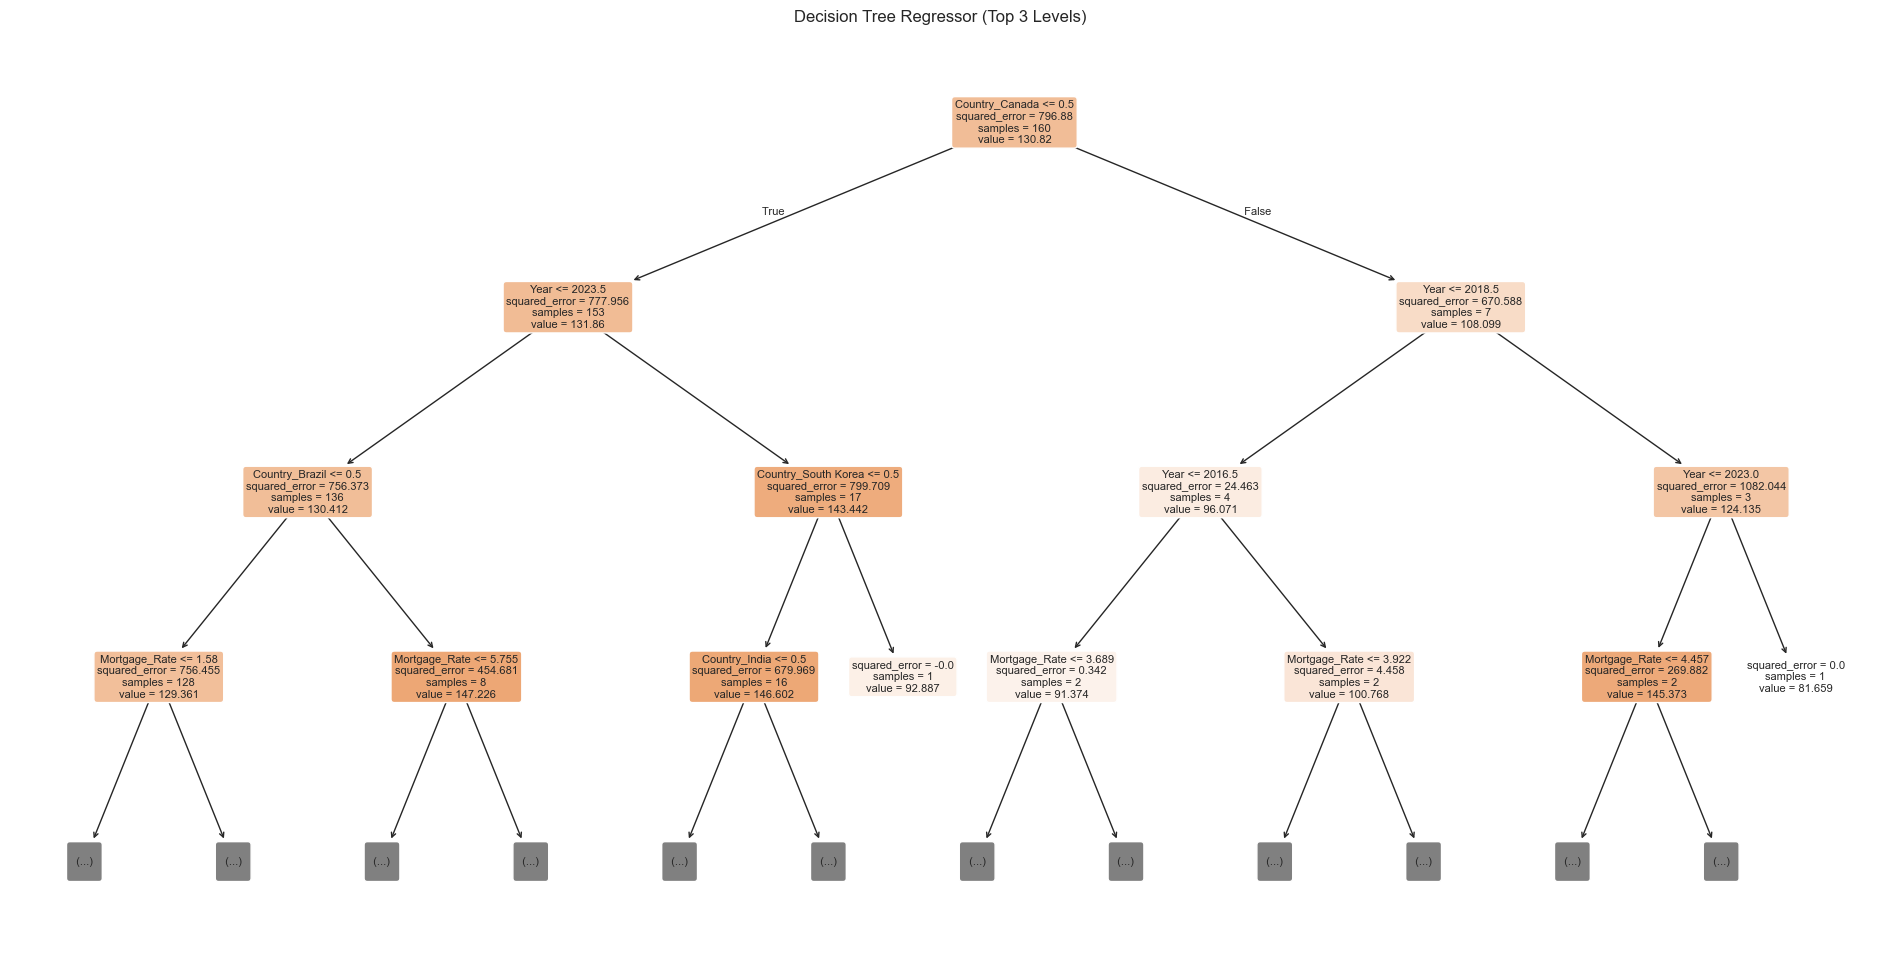

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the fitted decision tree model from the pipeline
tree_model = pipeline.named_steps['model']

# Get feature names after one-hot encoding
# Grab encoder from pipeline
encoder = pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(['Country'])

# Combine encoded categorical and numerical feature names
feature_names = list(encoded_cat_features) + ['Year', 'Mortgage_Rate']

# Plot the tree
plt.figure(figsize=(24, 12))
plot_tree(tree_model, feature_names=feature_names, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Regressor (Top 3 Levels)")
plt.show()
